In [1]:
import time
import requests

In [2]:
#PART 1
def fetch_probe_list():
  #Function to return list of active Starlink Probes
  starlink_probe_list = []
  api_endpoint = "https://atlas.ripe.net/api/v2/probes/?asn_v4=14593&status=1"

  params = {
      "asn_v4": 14593,  #Starlink ASN number
      "status": 1       #Connected Probes
  }

  response = requests.get(api_endpoint, params=params)
  json_data = response.json()

  for probe in json_data["results"]:
    starlink_probe_list.append({"id": probe["id"], "country_code": 
                                probe["country_code"]})

  print("Number of Probes: ", len(starlink_probe_list))
  return starlink_probe_list

In [3]:
probes = fetch_probe_list()
print(probes)

Number of Probes:  57
[{'id': 28, 'country_code': 'US'}, {'id': 10743, 'country_code': 'US'}, {'id': 10920, 'country_code': 'DE'}, {'id': 13040, 'country_code': 'FR'}, {'id': 17979, 'country_code': 'GB'}, {'id': 19983, 'country_code': 'AU'}, {'id': 20544, 'country_code': 'PL'}, {'id': 22802, 'country_code': 'US'}, {'id': 23127, 'country_code': 'US'}, {'id': 24742, 'country_code': 'AU'}, {'id': 26834, 'country_code': 'CL'}, {'id': 28221, 'country_code': 'US'}, {'id': 35042, 'country_code': 'CA'}, {'id': 35681, 'country_code': 'AT'}, {'id': 35751, 'country_code': 'GB'}, {'id': 50008, 'country_code': 'DE'}, {'id': 50017, 'country_code': 'US'}, {'id': 50941, 'country_code': 'US'}, {'id': 52422, 'country_code': 'US'}, {'id': 52918, 'country_code': 'AU'}, {'id': 52955, 'country_code': 'NZ'}, {'id': 53798, 'country_code': 'US'}, {'id': 54330, 'country_code': 'US'}, {'id': 55492, 'country_code': 'CA'}, {'id': 60323, 'country_code': 'DE'}, {'id': 60510, 'country_code': 'CA'}, {'id': 60929, 'cou

In [4]:
probes.sort(key= lambda a: a['country_code'])
print(probes)

countries = []
probe_list = []
for probe in probes:
    if probe['country_code'] not in countries:
        probe_list.append(probe['id'])
        countries.append(probe['country_code'])
print(probe_list)
print(countries)

[{'id': 35681, 'country_code': 'AT'}, {'id': 19983, 'country_code': 'AU'}, {'id': 24742, 'country_code': 'AU'}, {'id': 52918, 'country_code': 'AU'}, {'id': 1004453, 'country_code': 'AU'}, {'id': 1004828, 'country_code': 'AU'}, {'id': 1001356, 'country_code': 'BE'}, {'id': 35042, 'country_code': 'CA'}, {'id': 55492, 'country_code': 'CA'}, {'id': 60510, 'country_code': 'CA'}, {'id': 26834, 'country_code': 'CL'}, {'id': 1005623, 'country_code': 'CZ'}, {'id': 10920, 'country_code': 'DE'}, {'id': 50008, 'country_code': 'DE'}, {'id': 60323, 'country_code': 'DE'}, {'id': 1002289, 'country_code': 'DE'}, {'id': 1002750, 'country_code': 'DE'}, {'id': 13040, 'country_code': 'FR'}, {'id': 61241, 'country_code': 'FR'}, {'id': 62843, 'country_code': 'FR'}, {'id': 17979, 'country_code': 'GB'}, {'id': 35751, 'country_code': 'GB'}, {'id': 61366, 'country_code': 'GB'}, {'id': 61878, 'country_code': 'GB'}, {'id': 1005627, 'country_code': 'HT'}, {'id': 1004978, 'country_code': 'IT'}, {'id': 52955, 'countr

## Credit Calculation
It costs 1 credits per ping measurement (1 packets of 48 octets). We have 56 active probes connected to Starlink. If we measure every 15 minutes for an entire day, that is 4*24 = 96 measurements. 1 * 56 * 96 = 5376 credits

## (Part 3) Code to make pings to Starlink API

In [8]:
cur_time = time.time()


definitions = {
    "definitions": [
      {
        "type": "ping",
        "target": "google.com",
        "af": 4,
        "description": "test trial",
        "start_time": cur_time + 300,
        "end_time": cur_time + 86700,
        "interval": 900,
      }
    ],
    "probes" : [
      {"requested": 1,
       "type": "probes",
       "value": "1005623"
      }
    ]
}

def create_measurement(defs):
    api_endpoint = "https://atlas.ripe.net/api/v2/measurements"
    params={"key": '1721b7b6-100f-48b0-ad03-e2b6c95fb978'}

    x = requests.post(api_endpoint, json = defs, params=params)
    json_data = x.json()
    return json_data



In [31]:
create_measurement(definitions)

{'error': {'detail': 'There was a problem with your request',
  'status': 400,
  'title': 'Bad Request',
  'code': 102,
  'errors': [{'source': {'pointer': ''},
    'detail': 'We do not allow more than 25 concurrent measurements to the same target: google.com.'}]}}

In [5]:
def get_results(id):
    api_endpoint = "https://atlas.ripe.net/api/v2/measurements/" + id + "/results"
    x = requests.get(api_endpoint)
    json_data = x.json()
    return json_data

In [6]:
results = get_results("52789825")
print(results[0])
print(len(results))

{'fw': 5040, 'mver': '2.4.1', 'lts': 54, 'dst_name': '204.79.197.200', 'af': 4, 'dst_addr': '204.79.197.200', 'src_addr': '172.19.0.2', 'proto': 'ICMP', 'ttl': 119, 'size': 64, 'result': [{'rtt': 46.601713}, {'rtt': 50.951779}], 'dup': 0, 'rcvd': 2, 'sent': 2, 'min': 46.601713, 'max': 50.951779, 'avg': 48.776746, 'msm_id': 52789825, 'prb_id': 1002750, 'timestamp': 1682810897, 'msm_name': 'Ping', 'from': '145.224.74.136', 'type': 'ping', 'group_id': 52789825, 'step': 900, 'stored_timestamp': 1682810963}
48422


In [7]:
# split up by probe id
from collections import defaultdict

probe_data = defaultdict(list)
for object in results:
    probe_data[object['prb_id']].append(object)

# sort each list by timestamp
# probe_data_sorted = {}
for probe_id in probe_data.keys():
    probe_data[probe_id].sort(key = lambda x: x['timestamp'])
    # tmp = sorted(, )
    # probe_data_sorted[probe_id] = tmp

print(probe_data.keys())


dict_keys([1002750, 1003131, 1004232, 1004453, 1004876, 1004978, 1005561, 1005623, 1005627, 10743, 10920, 13040, 17979, 19983, 20544, 22802, 23127, 24742, 26696, 26834, 28221, 35042, 35681, 35751, 50017, 52422, 52918, 52955, 53798, 54330, 55492, 60323, 60510, 60929, 61081, 61113, 61241, 61366, 61537, 61731, 61780, 61899, 62083, 62365, 62417, 62498, 62553, 62613, 62741, 62843, 62868, 63017, 61878, 28])


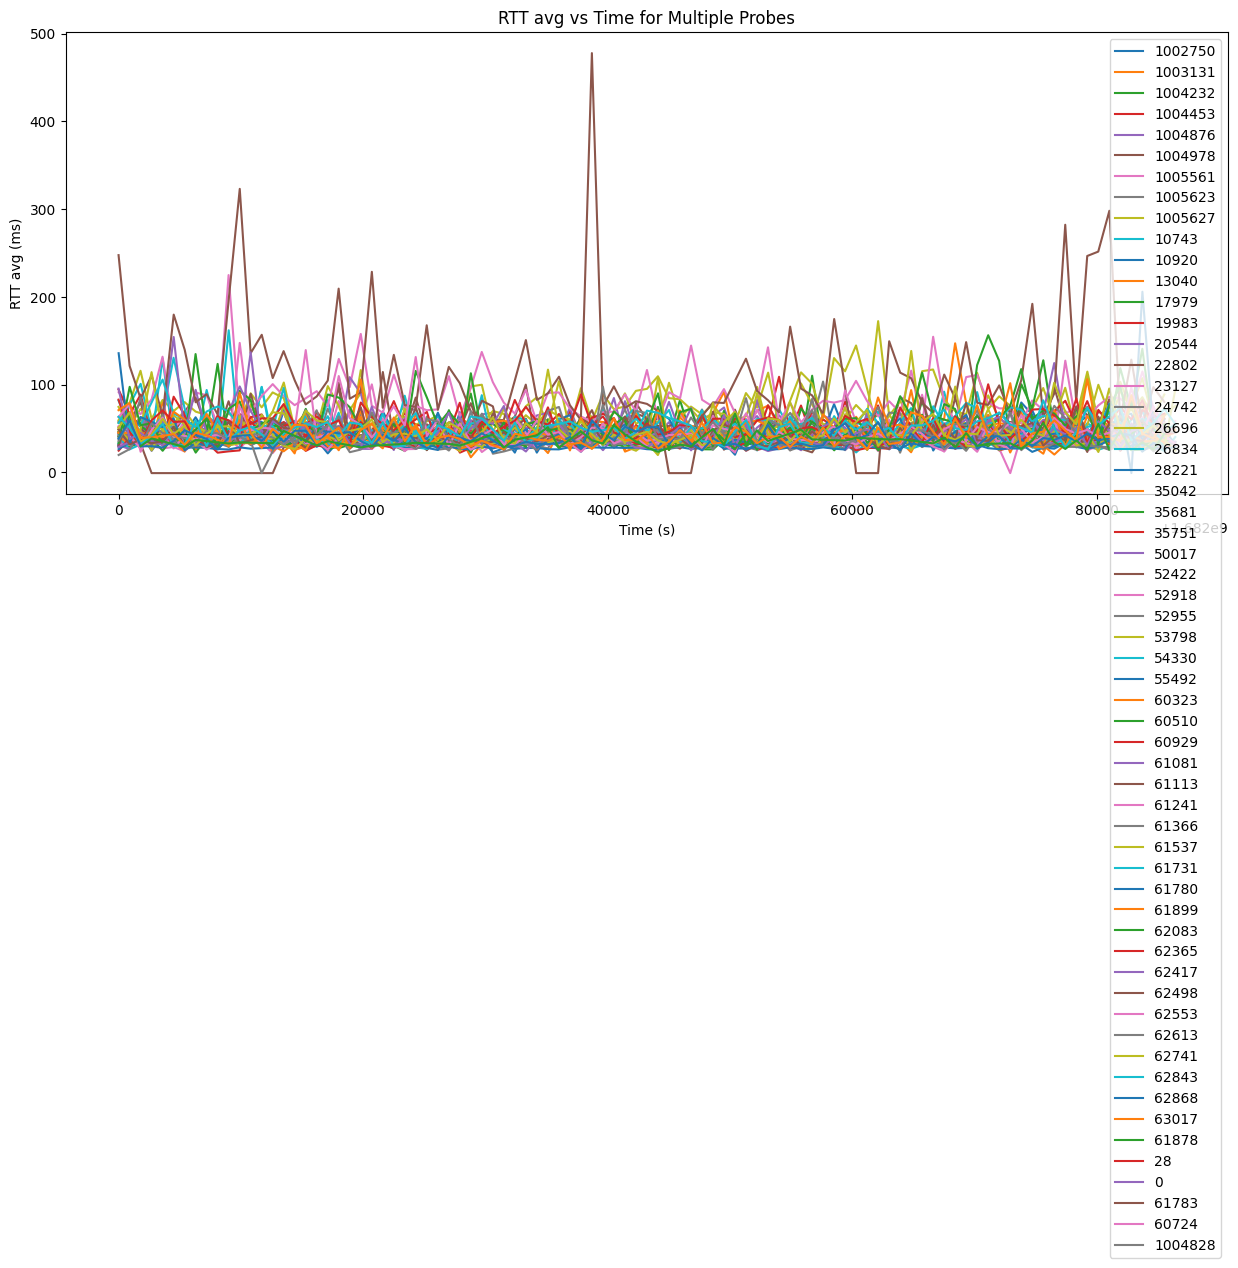

In [23]:
import matplotlib.pyplot as plt

# Create a plot with multiple lines
fig, ax = plt.subplots(figsize=(15,6))
for probe, values in probe_data.items():
    timestamps = [item['timestamp'] - 810897 for item in values if item['timestamp'] - 810897 < (86400+1.682e9)] 
    avgs = [item['avg'] for item in values if item['timestamp'] - 810897 < (86400+1.682e9)]
    ax.plot(timestamps, avgs, label=probe)

# Set labels and title
ax.set_xlabel("Time (s)")
ax.set_ylabel("RTT avg (ms)")
ax.set_title("RTT avg vs Time for Multiple Probes")

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a plot with multiple lines
fig, ax = plt.subplots(figsize=(6,15))
for probe, values in probe_data.items():
    timestamps = [item['timestamp'] - 810897 for item in values if item['timestamp'] - 810897 < (86400+1.682e9)] 
    avgs = [item['avg'] for item in values if item['timestamp'] - 810897 < (86400+1.682e9)]
    ax.plot(timestamps, avgs, label=probe)

# Set labels and title
ax.set_xlabel("Time (s)")
ax.set_ylabel("RTT avg (ms)")
ax.set_title("RTT avg vs Time for Multiple Probes")

# Add a legend
ax.legend()

# Show the plot
plt.show()

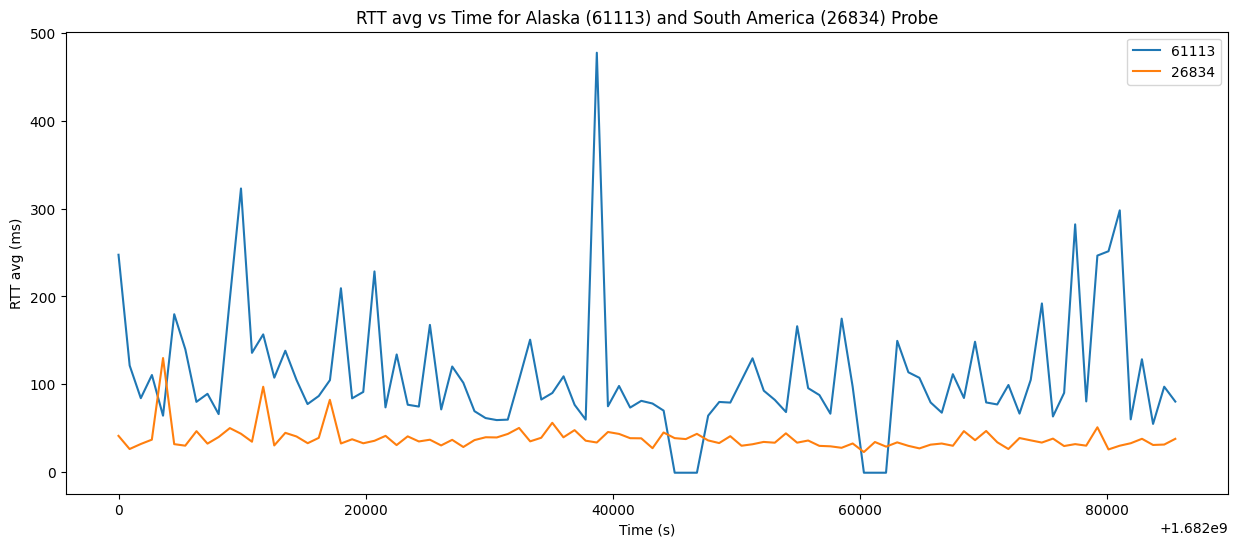

In [28]:
#Alaska vs South America probe
fig, ax = plt.subplots(figsize=(15,6))

al_sa_probes = {61113: probe_data[61113], 26834: probe_data[26834]}
for probe, values in al_sa_probes.items():
    timestamps = [item['timestamp'] - 810897 for item in values if item['timestamp'] - 810897 < (86400+1.682e9)] 
    avgs = [item['avg'] for item in values if item['timestamp'] - 810897 < (86400+1.682e9)]
    ax.plot(timestamps, avgs, label=probe)

# Set labels and title
ax.set_xlabel("Time (s)")
ax.set_ylabel("RTT avg (ms)")
ax.set_title("RTT avg vs Time for Alaska (61113) and South America (26834) Probe")

# Add a legend
ax.legend()

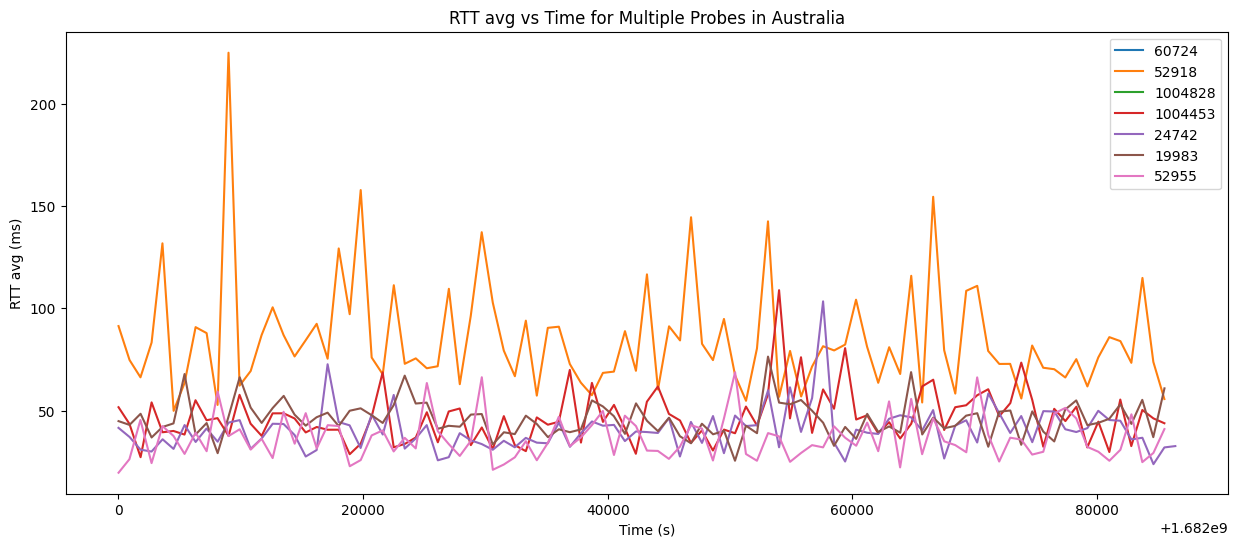

In [29]:
#Oceania Probes
australia_values = {60724: probe_data[60724], 52918: probe_data[52918], 1004828: probe_data[1004828], 1004453: probe_data[1004453], 24742: probe_data[24742], 19983: probe_data[19983], 52955: probe_data[52955]}
import matplotlib.pyplot as plt

# Create a plot with multiple lines
fig, ax = plt.subplots(figsize=(15,6))
for probe, values in australia_values.items():
    timestamps = [item['timestamp'] - 810897 for item in values if item['timestamp'] - 810897 < (86400+1.682e9)] 
    avgs = [item['avg'] for item in values if item['timestamp'] - 810897 < (86400+1.682e9)]
    ax.plot(timestamps, avgs, label=probe)

# Set labels and title
ax.set_xlabel("Time (s)")
ax.set_ylabel("RTT avg (ms)")
ax.set_title("RTT avg vs Time for Multiple Probes in Australia")

# Add a legend
ax.legend()

# Show the plot
plt.show()

slowest Australia probe is in the Northwest region of Australia

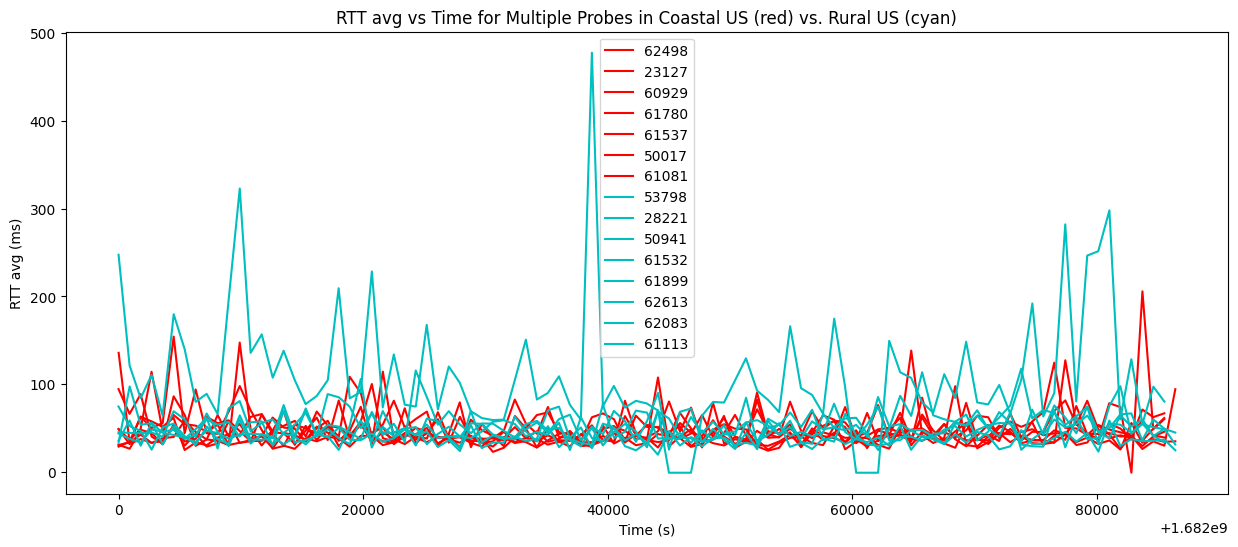

In [46]:
#Coastal US Probes
coastal_us_data = {
    62498: probe_data[62498],
    23127: probe_data[23127],
    60929: probe_data[60929],
    61780: probe_data[61780],
    61537: probe_data[61537],
    50017: probe_data[50017],
    61081: probe_data[61081]
}
central_us_data = {
    53798: probe_data[53798],
    28221: probe_data[28221],
    50941: probe_data[50941],
    61532: probe_data[61532],
    61899: probe_data[61899],
    62613: probe_data[62613],
    62083: probe_data[62083],
    61113: probe_data[61113]
}
import matplotlib.pyplot as plt

# Create a plot with multiple lines
fig, ax = plt.subplots(figsize=(15,6))
for probe, values in coastal_us_data.items():
    timestamps = [item['timestamp'] - 810897 for item in values if item['timestamp'] - 810897 < (86400+1.682e9)] 
    avgs = [item['avg'] for item in values if item['timestamp'] - 810897 < (86400+1.682e9)]
    ax.plot(timestamps, avgs, label=probe, color='r')

for probe, values in central_us_data.items():
    timestamps = [item['timestamp'] - 810897 for item in values if item['timestamp'] - 810897 < (86400+1.682e9)] 
    avgs = [item['avg'] for item in values if item['timestamp'] - 810897 < (86400+1.682e9)]
    ax.plot(timestamps, avgs, label=probe, color='c')
# Set labels and title
ax.set_xlabel("Time (s)")
ax.set_ylabel("RTT avg (ms)")
ax.set_title("RTT avg vs Time for Multiple Probes in Coastal US (red) vs. Rural US (cyan)")

# Add a legend
ax.legend()

# Show the plot
plt.show()

Alaska is the outlier node.